# Final Data Science Project
## By: Sebastian Tucker-Kyriakos

In [405]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.io as pio
pio.renderers.defaule = 'colab'

from itables import show

In [596]:
# importing data
file_name = 'Data/train.csv'
DF = pd.read_csv(file_name)
show(DF)

## Questions: 

### Questions 1: Which Variables Have the Greatest Effect on Depression

In [346]:
DF.groupby(['Study Satisfaction', 'Depression']).size().reset_index(name='count')

,Study Satisfaction,Depression,count
0,1.0,0,1594
1,1.0,1,3857
2,2.0,0,2071
3,2.0,1,3769
4,3.0,0,2469
5,3.0,1,3354
6,4.0,0,3095
7,4.0,1,3265
8,5.0,0,2334
9,5.0,1,2089


In [1]:
# This code creates two collections of pie charts, each with five pie charts. Each collection checks the relationship with the
# rate of depression with a different variable. The first looks at study satisfaction vs depression, and the second looks at
# work satisfaction vs depression.

# both collections use very similar code in order to make. The only real difference between the two are the labels and the data

# this creates the data frame that will be used for the first set of pie chartss
# It creates a data frame and sets it to DF, after applyinga lot of functions to it. 
# first of all, it only picks out the 'Study Satisfaction' and 'Depression' columns, since that's all we're using. It looks at 
# the .value_counts for these two columns, meaning it returns the unique combinations for it. The next part, 
# being the ".reset_index(name='count')", converts this into a data frame with 'count' as the name for the column with the
# frequency of each combination. Finally, .sort_values(by='Study Satisfaction', ascending=False) sorts the values using the 
# study satisfaction column, with it not being ascending.
DF_Depression_Influence = (
DF.value_counts(subset=['Study Satisfaction', 'Depression']).reset_index(name='count').sort_values(by='Study Satisfaction', ascending=False)
) 
# creating the pi chart and using the new data frame we just made
fig1 = px.pie(DF_Depression_Influence, 
    values='count', 
    names = 'Depression',
    facet_col='Study Satisfaction',
    color = 'Depression',
    category_orders={'Depression' : [0,1]},
    
)


fig1.update_layout(
    template='ggplot2',
                  legend_title='Depression',
                  width=900,
                  height=300,

    title={
        'font': dict(size=25),
        'text': "How Do Different Variables Influence Depression Rates? <br> <sup>Study Satisfaction Vs. Depression<sup>",
        'x': 0.5,  # Center the title horizontally
        'y': 0.95,  # Adjust vertical position (closer to top)
        'xanchor': 'center',  # Anchor horizontally
        'yanchor': 'top',  # Anchor vertically
         
    },
    font={'family':"Times",'size':12,'color':"Darkblue"}
                      )

fig1.show()


DF_Depression_Influence = (
DF.value_counts(subset=['Job Satisfaction', 'Depression']).reset_index(name='count').sort_values(by='Job Satisfaction', ascending=False)
    

)


fig2 = px.pie(DF_Depression_Influence, 
    values='count', 
    facet_col='Job Satisfaction',
    color = 'Depression',
    facet_col_wrap = 5,
    category_orders={'Depression' : [1,0]},
    
)


fig2.update_layout(
                  width=900,
                  height=300,
    title={
        'font': dict(size=18),
        'text': "Job Satisfaction Vs. Depression",
        'x': 0.5,  # Center the title horizontally
        'y': 0.95,  # Adjust vertical position (closer to top)
    },
        font={'family':"Times",'size':12,'color':"Darkblue"}
                      
)
fig2.show()


# everything below this comment is unused code for another pie chart aout financial stress that I decided against using for my part
DF_Depression_Influence = (
DF.value_counts(subset=['Financial Stress', 'Depression']).reset_index(name='count').sort_values(by='Financial Stress', ascending=True)

)

fig3 = px.pie(DF_Depression_Influence, 
    values='count', 
    facet_col='Financial Stress',
    color = 'Depression',
    facet_col_wrap = 5,
    category_orders={'Depression' : [1,0]},
   
)


fig3.update_layout(
                  width=900,
                  height=300,
    title={
        'font': dict(size=18),
        'text': "Financial Stress Vs. Depression",
        'x': 0.5,  # Center the title horizontally
        'y': 0.95,  # Adjust vertical position (closer to top)
    },
        font={'family':"Times",'size':12,'color':"Darkblue"}
                      
)

#fig3.show()

NameError: name 'DF' is not defined

### How does age influence depression

In [457]:
show(DF)

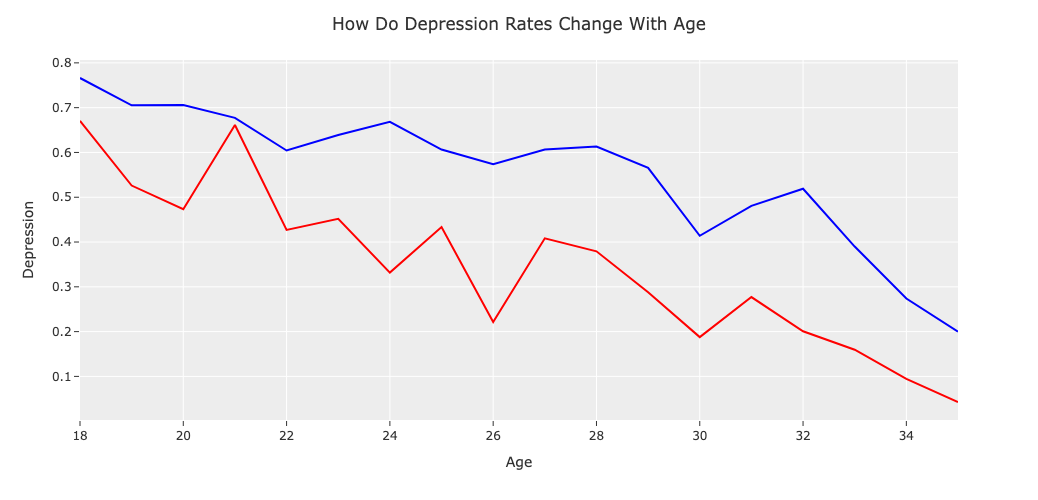

In [585]:
# creating data frame for the line that works with students

# create new empty data frame in order to next fill it with columns from the origonal data frame
DF_age_with_students = pd.DataFrame()

# moving over columns from the original data frame to the new one, specifically the columns depression, age, and family history
# of mental illnesses
DF_age_with_students['Depression'] = DF['Depression']
DF_age_with_students['Age'] = DF['Age']
DF_age_with_students['Working Professional or Student'] = DF['Working Professional or Student']

#series of masks. First mask filters out only the students for this data frame
mask = (DF_age_with_students['Working Professional or Student'] == "Student")
# this applies the mask
DF_age_with_students = DF_age_with_students[mask]
# deletes that column since we don't use it and it gets in the way
del DF_age_with_students['Working Professional or Student']
# masking to avoid ages above 35, since there are only a couple data points there and it throws off the data
mask = (DF_age_with_students['Age'] <= 35)
#applying mask
DF_age_with_students = DF_age_with_students[mask]


#creating first graph with students
DF_age_with_students = DF_age_with_students.groupby('Age').mean().reset_index()
fig_students = px.line(DF_age_with_students, 
    x = 'Age',
    y = 'Depression'
)

fig_students.update_layout(
                  title='How Do Depression Rates Change With Age',
                  template='ggplot2',
                  width=800,
                  height=500,
                      )
fig_students.update_traces(name="Students", line=dict(color='blue'))

#creating second line for workers
# create new empty data frame in order to next fill it with columns from the origonal data frame
DF_age_with_workers = pd.DataFrame()

# moving over columns from the original data frame to the new one, specifically the columns depression, age, and family history
# of mental illnesses
DF_age_with_workers['Depression'] = DF['Depression']
DF_age_with_workers['Age'] = DF['Age']
DF_age_with_workers['Working Professional or Student'] = DF['Working Professional or Student']

mask = (DF_age_with_workers['Working Professional or Student'] == "Working Professional")
DF_age_with_workers = DF_age_with_workers[mask]
del DF_age_with_workers['Working Professional or Student']
mask = (DF_age_with_workers['Age'] <= 35)
DF_age_with_workers = DF_age_with_workers[mask]


DF_age_with_workers = DF_age_with_workers.groupby('Age').mean().reset_index()
fig_workers = px.line(DF_age_with_workers, 
    x = 'Age',
    y = 'Depression'
)
fig_workers.update_traces(name="Workers", line=dict(color='red'))


fig_students.add_traces(fig_workers.data)
fig_students.update_layout(
    title='How Do Depression Rates Change With Age',
    template='ggplot2',
    width=800,
    height=500,
    legend_title="Group", 
    legend=dict(x=0.8, y=1.0)
)
fig_students.show()


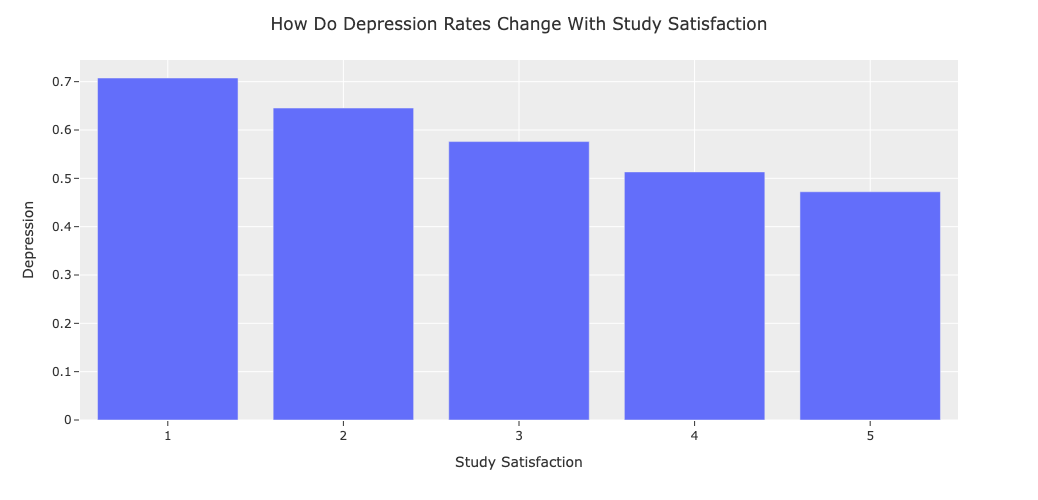

In [624]:
DF_Study_Satisfaction = pd.DataFrame()

DF_Study_Satisfaction['Depression'] = DF['Depression']
DF_Study_Satisfaction['Study Satisfaction'] = DF['Study Satisfaction']
DF_Study_Satisfaction['Working Professional or Student'] = DF['Working Professional or Student']

#series of masks. First mask filters out only the students for this data frame
mask = (DF_Study_Satisfaction['Working Professional or Student'] == "Student")
# this applies the mask
DF_Study_Satisfaction = DF_Study_Satisfaction[mask]
# deletes that column since we don't use it and it gets in the way
del DF_Study_Satisfaction['Working Professional or Student']
# masking to avoid ages above 35, since there are only a couple data points there and it throws off the data
mask = (DF_Study_Satisfaction['Study Satisfaction'] <= 35)
#applying mask
DF_Study_Satisfaction = DF_Study_Satisfaction[mask]


#creating first graph with students
DF_Study_Satisfaction = DF_Study_Satisfaction.groupby('Study Satisfaction').mean().reset_index()
show(DF_Study_Satisfaction)
fig_students = px.bar(DF_Study_Satisfaction, 
    x = 'Study Satisfaction',
    y = 'Depression'
)

fig_students.update_layout(
                  title='How Do Depression Rates Change With Study Satisfaction',
                  template='ggplot2',
                  width=800,
                  height=500,
                      )

fig_students.show()

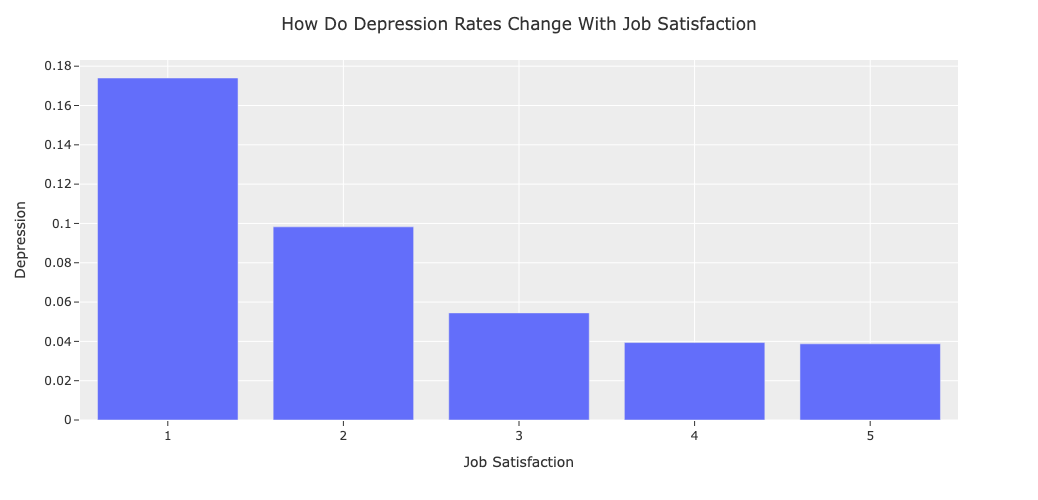

In [625]:
DF_Work_Satisfaction = pd.DataFrame()

DF_Work_Satisfaction['Depression'] = DF['Depression']
DF_Work_Satisfaction['Job Satisfaction'] = DF['Job Satisfaction']
DF_Work_Satisfaction['Working Professional or Student'] = DF['Working Professional or Student']

#series of masks. First mask filters out only the students for this data frame
mask = (DF_Work_Satisfaction['Working Professional or Student'] == "Working Professional")
# this applies the mask
DF_Work_Satisfaction = DF_Work_Satisfaction[mask]
# deletes that column since we don't use it and it gets in the way
del DF_Work_Satisfaction['Working Professional or Student']
# masking to avoid ages above 35, since there are only a couple data points there and it throws off the data
mask = (DF_Work_Satisfaction['Job Satisfaction'] <= 35)
#applying mask
DF_Work_Satisfaction = DF_Work_Satisfaction[mask]


#creating first graph with students
DF_Work_Satisfaction = DF_Work_Satisfaction.groupby('Job Satisfaction').mean().reset_index()
show(DF_Work_Satisfaction)
fig_workers = px.bar(DF_Work_Satisfaction, 
    x = 'Job Satisfaction',
    y = 'Depression'
)

fig_workers.update_layout(
                  title='How Do Depression Rates Change With Job Satisfaction',
                  template='ggplot2',
                  width=800,
                  height=500,
                      )
fig_workers.show()

In [628]:
newvariable = (
DF.value_counts(subset=['Working Professional or Student', 'Depression']).reset_index(name='count').sort_values(by='Working Professional or Student', ascending=False)
    

)



show(newvariable)

112799

working: 0.0818358319
student: 0.585498728
both: 
27901

In [626]:
DF

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140695,140695,Vidya,Female,18.0,Ahmedabad,Working Professional,NaN,NaN,5.0,NaN,NaN,4.0,5-6 hours,Unhealthy,Class 12,No,2.0,4.0,Yes,1
140696,140696,Lata,Female,41.0,Hyderabad,Working Professional,Content Writer,NaN,5.0,NaN,NaN,4.0,7-8 hours,Moderate,B.Tech,Yes,6.0,5.0,Yes,0
140697,140697,Aanchal,Female,24.0,Kolkata,Working Professional,Marketing Manager,NaN,3.0,NaN,NaN,1.0,More than 8 hours,Moderate,B.Com,No,4.0,4.0,No,0
140698,140698,Prachi,Female,49.0,Srinagar,Working Professional,Plumber,NaN,5.0,NaN,NaN,2.0,5-6 hours,Moderate,ME,Yes,10.0,1.0,No,0


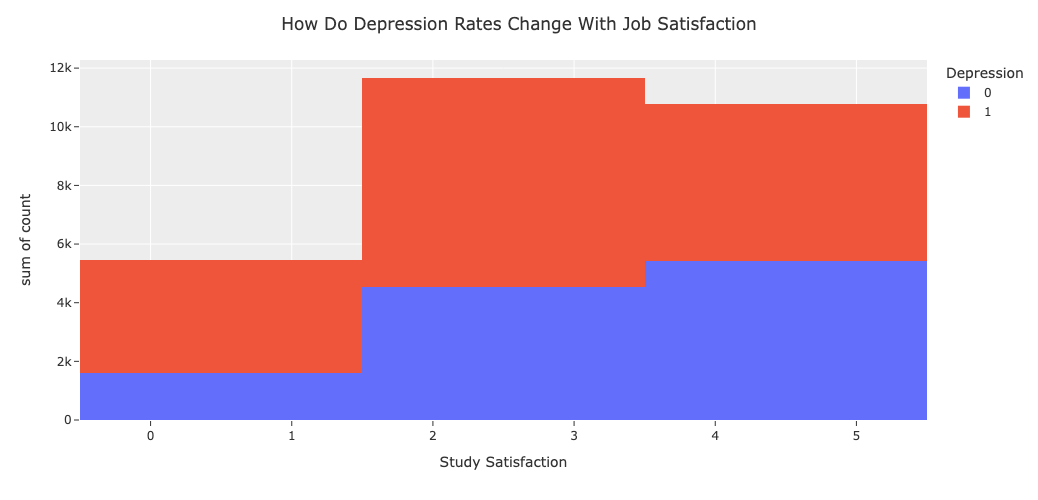

In [643]:
DF_Depression_Influence = (
DF.value_counts(subset=['Study Satisfaction', 'Depression']).reset_index(name='count').sort_values(by='Study Satisfaction', ascending=False)
) 
show(DF_Depression_Influence)
fig = px.histogram(DF_Depression_Influence,
    x = 'Study Satisfaction',
                   y = 'count',
                   color = 'Depression'
)
fig.update_layout(
                  title='How Do Depression Rates Change With Job Satisfaction',
                  template='ggplot2',
                  width=800,
                  height=500,
                      )
fig.show()

